<a href="https://colab.research.google.com/github/MeeGyo/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [3]:
from sklearn.datasets import load_digits #scikit-learn

digits = load_digits()
X = digits.data
y = digits.target

print("Shape of data:", X.shape)
print("Shape of target:", y.shape)
print("Number of classes:", len(digits.target_names))
print("First 5 target labels:", y[:5])

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10
First 5 target labels: [0 1 2 3 4]


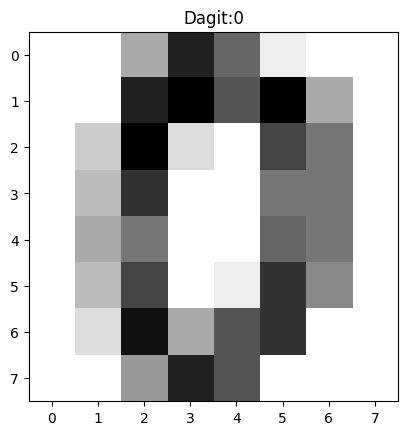

In [8]:
import matplotlib.pyplot as plt

first_image = X[0]
first_label = y[0]

image_reshaped = first_image.reshape((8, 8))
plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Dagit:{first_label}')
plt.show()

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.shape

(1797, 65)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
